In [31]:
%matplotlib notebook

# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import linregress
from datetime import datetime
import matplotlib
import time
import calendar
import gmaps

from r_api import g_key


In [33]:
# Create a reference the CSV file desired
SARS_csv = "../group3/SARS_data/sars_2003_complete_dataset_clean.csv"

# Read the CSV into a Pandas DataFrame
SARS_df = pd.read_csv(SARS_csv)

SARS_df

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0
...,...,...,...,...,...
2533,2003-07-11,Switzerland,1,0,1
2534,2003-07-11,Thailand,9,2,7
2535,2003-07-11,United Kingdom,4,0,4
2536,2003-07-11,United States,75,0,67


In [34]:
grouped_SARS = SARS_df.groupby('Date')
cumulative_SARS = grouped_SARS.sum()

SARS_summary = pd.DataFrame({
                             "Case Count": cumulative_SARS['Cumulative number of case(s)'],
                             "Death Count": cumulative_SARS['Number of deaths'],
                             "Recovered Count": cumulative_SARS['Number recovered']
                            })

SARS_summary = SARS_summary.reset_index()
SARS_summary

,Date,Case Count,Death Count,Recovered Count
0,2003-03-17,167,4,0
1,2003-03-18,219,4,0
2,2003-03-19,264,9,0
3,2003-03-20,306,10,0
4,2003-03-21,350,10,0
...,...,...,...,...
91,2003-07-07,8434,812,7426
92,2003-07-08,8431,812,7428
93,2003-07-09,8431,812,7438
94,2003-07-10,8432,812,7444


In [35]:
# Combine Chinese Data
SARS_china = SARS_df.replace(to_replace=['Hong Kong SAR, China', 'Macao SAR, China', 'Taiwan, China'],
                value='China')
SARS_final = SARS_china.replace(to_replace=['Viet Nam'],
                value='Vietnam')

country_totals = SARS_final[SARS_final['Date'] == max(SARS_final['Date'])].reset_index()
country_totals

,index,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2507,2003-07-11,Brazil,1,0,1
1,2508,2003-07-11,Canada,250,38,194
2,2509,2003-07-11,China,5327,348,4941
3,2510,2003-07-11,China,1755,298,1433
4,2511,2003-07-11,China,1,0,1
5,2512,2003-07-11,China,671,84,507
6,2513,2003-07-11,Colombia,1,0,1
7,2514,2003-07-11,Finland,1,0,1
8,2515,2003-07-11,France,7,1,6
9,2516,2003-07-11,Germany,10,0,9


In [36]:
grouped_countries = country_totals.groupby('Country')
grouped_countries = grouped_countries.sum()
grouped_countries = grouped_countries.drop(['index'], axis=1)

country_summary = pd.DataFrame({
                             "Case Count": grouped_countries['Cumulative number of case(s)'],
                             "Death Count": grouped_countries['Number of deaths'],
                             "Recovered Count": grouped_countries['Number recovered'],
                             "Mortality Rate": 100*(grouped_countries['Number of deaths']/grouped_countries['Cumulative number of case(s)'])
                            })

country_summary['Mortality Rate'] = country_summary['Mortality Rate'].map("{:.2f}%".format)

country_summary

,Case Count,Death Count,Recovered Count,Mortality Rate
Country,,,,
Brazil,1,0,1,0.00%
Canada,250,38,194,15.20%
China,7754,730,6882,9.41%
Colombia,1,0,1,0.00%
Finland,1,0,1,0.00%
France,7,1,6,14.29%
Germany,10,0,9,0.00%
India,3,0,3,0.00%
Indonesia,2,0,2,0.00%


<IPython.core.display.Javascript object>


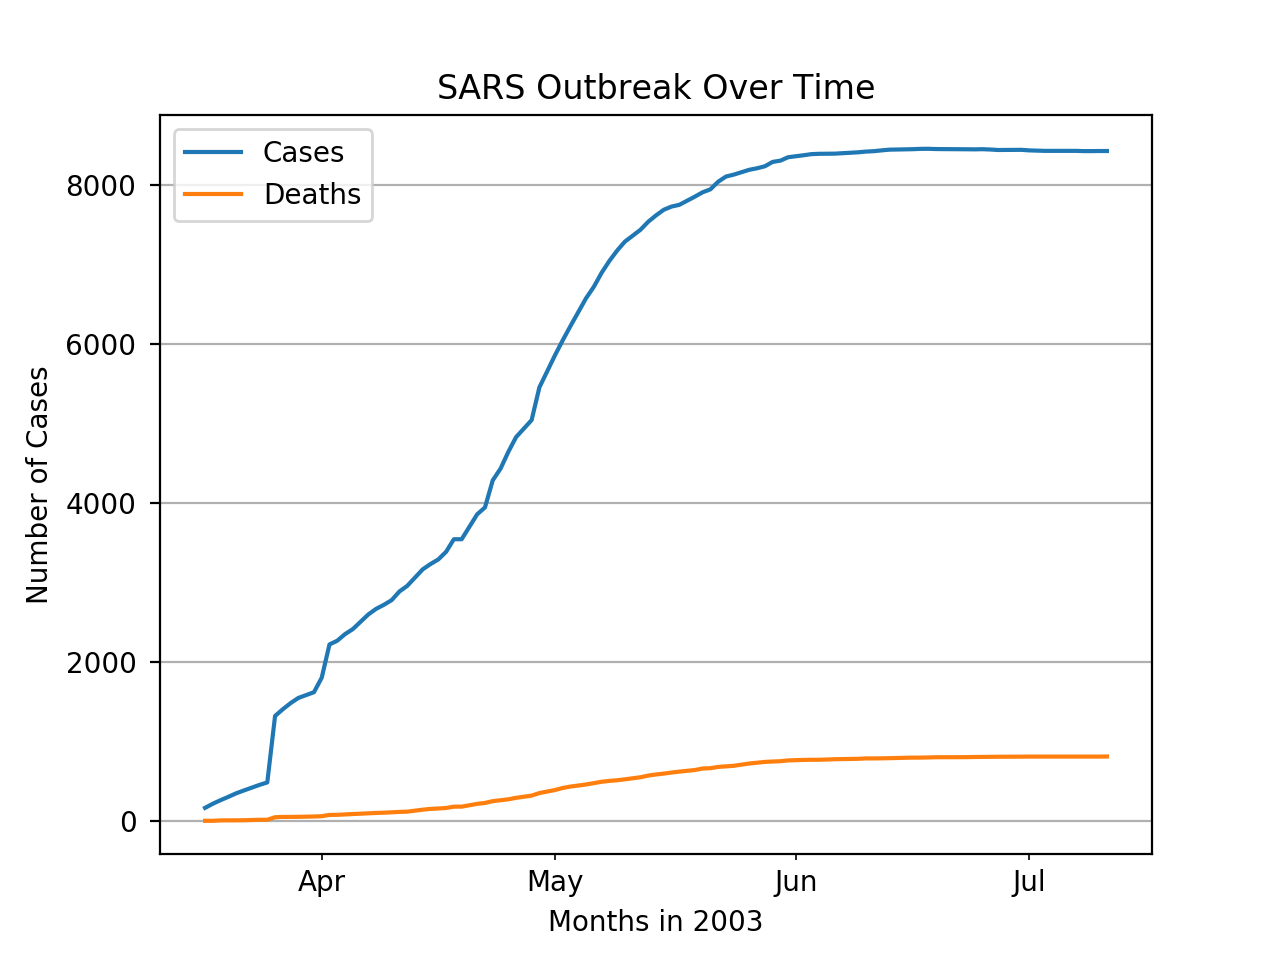

In [37]:
summed_dates = []
for row in SARS_summary['Date']:
    summed_dates.append(matplotlib.dates.date2num(datetime.strptime(row, '%Y-%m-%d')))

cases_over_time, = plt.plot(summed_dates, SARS_summary['Case Count'], label="Cases")
deaths_over_time, = plt.plot(summed_dates, SARS_summary['Death Count'], label="Deaths")

# x_axis = dates
# y_axis = SARS_summary['Case Count']

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(pad=5)

# ax.plot(x_axis, y_axis)
plt.title("SARS Outbreak Over Time")
plt.xlabel("Months in 2003")
plt.ylabel("Number of Cases")
plt.legend(handles=[cases_over_time, deaths_over_time], loc="best")
plt.grid()
plt.show()


In [38]:
# Create and clean lat/lng csv
lat_lng_csv = "../group3/citycoords.csv"
lat_lng_df = pd.read_csv(lat_lng_csv)
lat_lng_df = lat_lng_df.rename(columns={"name_long": "Country"})
lat_lng_df = lat_lng_df.replace(to_replace=['Ireland'],
                value='Republic of Ireland')

countries_lat_lng = pd.merge(country_summary, lat_lng_df, on='Country')

countries_lat_lng = countries_lat_lng[['Country', 'Case Count', 'Death Count', 'Recovered Count', 'Mortality Rate', 'Longitude', 'Latitude']]

# Access maps with unique API key
gmaps.configure(api_key=g_key)

locations = countries_lat_lng[["Latitude", "Longitude"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=countries_lat_lng['Case Count'], 
                                 dissipating=False, max_intensity=70,
                                 point_radius=5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
SARS_cases = country_summary['Case Count'].sum()

SARS_deaths = country_summary['Death Count'].sum()

final_summary = pd.DataFrame({'Cases': [SARS_cases],
                              'Deaths': [SARS_deaths]
                            })

final_summary['Mortality Rate'] = 100*(final_summary['Deaths']/final_summary['Cases'])
final_summary['Mortality Rate'] = final_summary['Mortality Rate'].map("{:.2f}%".format)


final_summary

,Cases,Deaths,Mortality Rate
0,8432,813,9.64%


In [40]:
daily_SARS_cases = [SARS_summary.iloc[0,1]]
daily_SARS_deaths = [SARS_summary.iloc[0,2]]
for x in range(1,len(SARS_summary)):
    daily_case = SARS_summary.iloc[x,1] - SARS_summary.iloc[x-1,1]
    daily_SARS_cases.append(daily_case)
    daily_deaths = SARS_summary.iloc[x,2] - SARS_summary.iloc[x-1,2]
    daily_SARS_deaths.append(daily_deaths)

daily_SARS_cases
daily_SARS_deaths

SARS_summary['Daily Cases'] = daily_SARS_cases
SARS_summary['Daily Deaths'] = daily_SARS_deaths

SARS_summary

,Date,Case Count,Death Count,Recovered Count,Daily Cases,Daily Deaths
0,2003-03-17,167,4,0,167,4
1,2003-03-18,219,4,0,52,0
2,2003-03-19,264,9,0,45,5
3,2003-03-20,306,10,0,42,1
4,2003-03-21,350,10,0,44,0
...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0,0
92,2003-07-08,8431,812,7428,-3,0
93,2003-07-09,8431,812,7438,0,0
94,2003-07-10,8432,812,7444,1,0


In [41]:
SARS_summary['Month and Year'] = pd.to_datetime(SARS_summary['Date']).dt.to_period('M')

SARS_summary

,Date,Case Count,Death Count,Recovered Count,Daily Cases,Daily Deaths,Month and Year
0,2003-03-17,167,4,0,167,4,2003-03
1,2003-03-18,219,4,0,52,0,2003-03
2,2003-03-19,264,9,0,45,5,2003-03
3,2003-03-20,306,10,0,42,1,2003-03
4,2003-03-21,350,10,0,44,0,2003-03
...,...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0,0,2003-07
92,2003-07-08,8431,812,7428,-3,0,2003-07
93,2003-07-09,8431,812,7438,0,0,2003-07
94,2003-07-10,8432,812,7444,1,0,2003-07


In [58]:
monthly_grouping = SARS_summary.groupby('Month and Year')
monthly_grouping = monthly_grouping.sum()
monthly_grouping

monthly_sars_summary = pd.DataFrame({'Monthly Cases': monthly_grouping['Daily Cases'],
                                     'Monthly Deaths': monthly_grouping['Daily Deaths'],
                                     })

monthly_sars_summary = monthly_sars_summary.reset_index()
monthly_sars_summary['Month'] = monthly_sars_summary['Month and Year'].dt.month
monthly_sars_summary['Year'] = monthly_sars_summary['Month and Year'].dt.year

monthly_sars_summary


,Month and Year,Monthly Cases,Monthly Deaths,Month,Year
0,2003-03,1622,58,3,2003
1,2003-04,4037,314,4,2003
2,2003-05,2695,392,5,2003
3,2003-06,93,47,6,2003
4,2003-07,-15,2,7,2003


In [59]:
# monthly_sars_summary.plot.line()
# plt.show()

In [60]:
flight_data_df = pd.read_csv('RawData/Flights_3_12_2020.csv')

In [61]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"815,489","92,565","908,054"
1,2002,11,"766,775","91,342","858,117"
2,2002,12,"782,175","96,881","879,056"
3,2002,TOTAL,"8,085,083","1,023,994","9,109,077"
4,2003,1,"785,651","98,053","883,704"
...,...,...,...,...,...
224,2019,TOTAL,"8,591,641","1,620,275","10,211,916"
225,NaN,NaN,NaN,NaN,NaN
226,Note: All numbers are for scheduled services.,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN


In [62]:
# Drop the last few rows which have null values
flight_data_df = flight_data_df.dropna(how='any')

In [63]:
# Drop the rows which have totals for each year
flight_data_df = flight_data_df[flight_data_df['Month'] != 'TOTAL']

In [64]:
columns = flight_data_df.columns
for column in columns:
    flight_data_df[column] = flight_data_df[column].str.replace(",","").astype(float)

In [65]:
flight_data_df['Year'] = flight_data_df['Year'].astype(int)
flight_data_df['Month'] = flight_data_df['Month'].astype(int)

In [66]:
Date = []
for y, m in zip(flight_data_df.Year, flight_data_df.Month):
    Date.append(datetime(y, m, 1))

flight_data_df['Date'] = Date

<IPython.core.display.Javascript object>


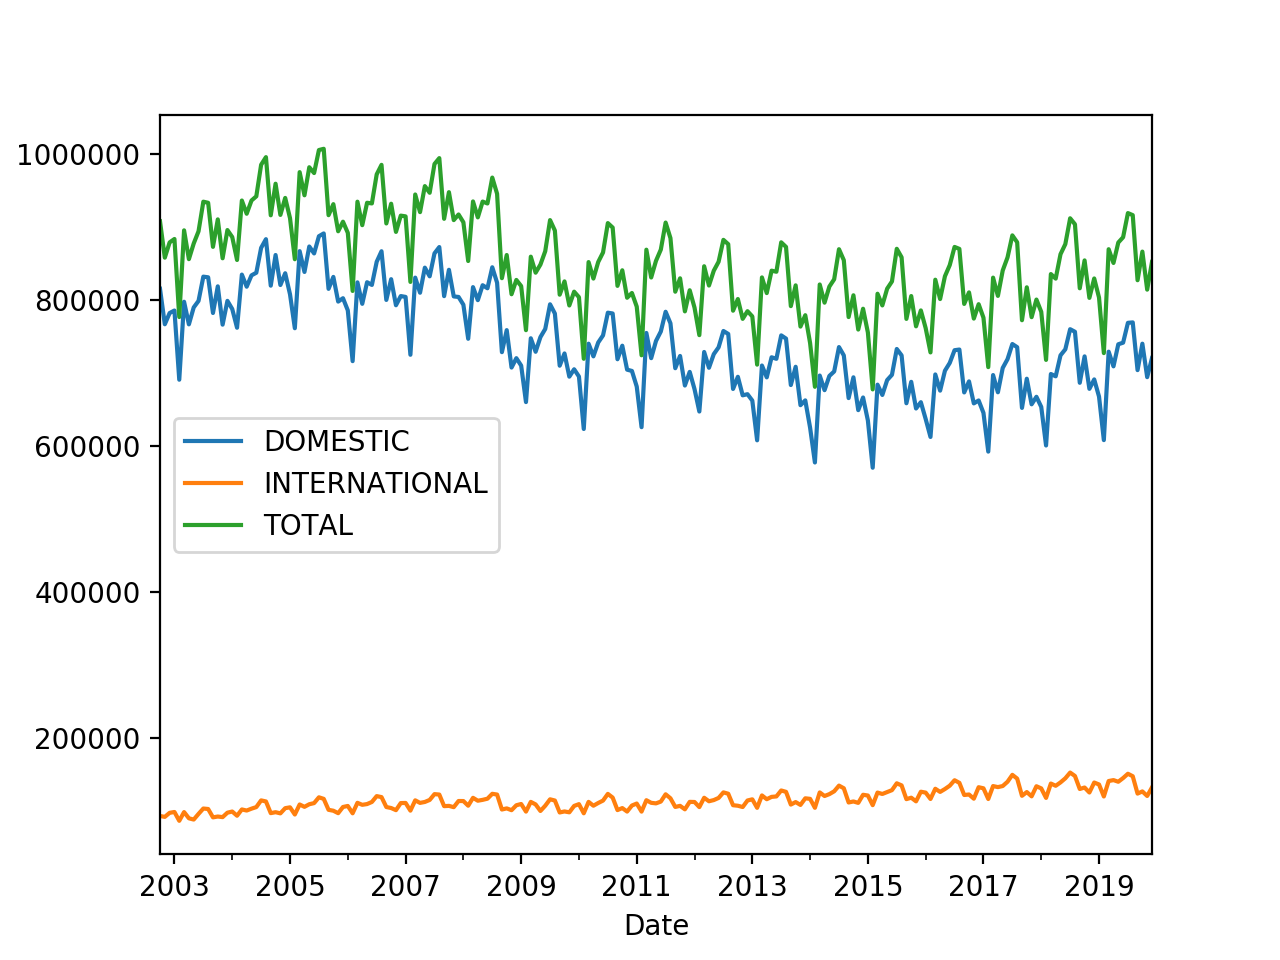

In [69]:
ax = plt.gca()
flight_data_df.plot.line(x = 'Date', y='DOMESTIC',ax=ax)
flight_data_df.plot.line(x = 'Date', y='INTERNATIONAL',ax=ax)
flight_data_df.plot.line(x = 'Date', y='TOTAL',ax=ax)
plt.show()

In [68]:
sars_flight_data = pd.merge(flight_data_df, monthly_sars_summary, on=['Month', 'Year'])

sars_flight_data

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Date,Month and Year,Monthly Cases,Monthly Deaths
0,2003,3,797634.0,97929.0,895563.0,2003-03-01,2003-03,1622,58
1,2003,4,766639.0,89398.0,856037.0,2003-04-01,2003-04,4037,314
2,2003,5,789857.0,87671.0,877528.0,2003-05-01,2003-05,2695,392
3,2003,6,798841.0,95435.0,894276.0,2003-06-01,2003-06,93,47
4,2003,7,832075.0,102795.0,934870.0,2003-07-01,2003-07,-15,2


<IPython.core.display.Javascript object>


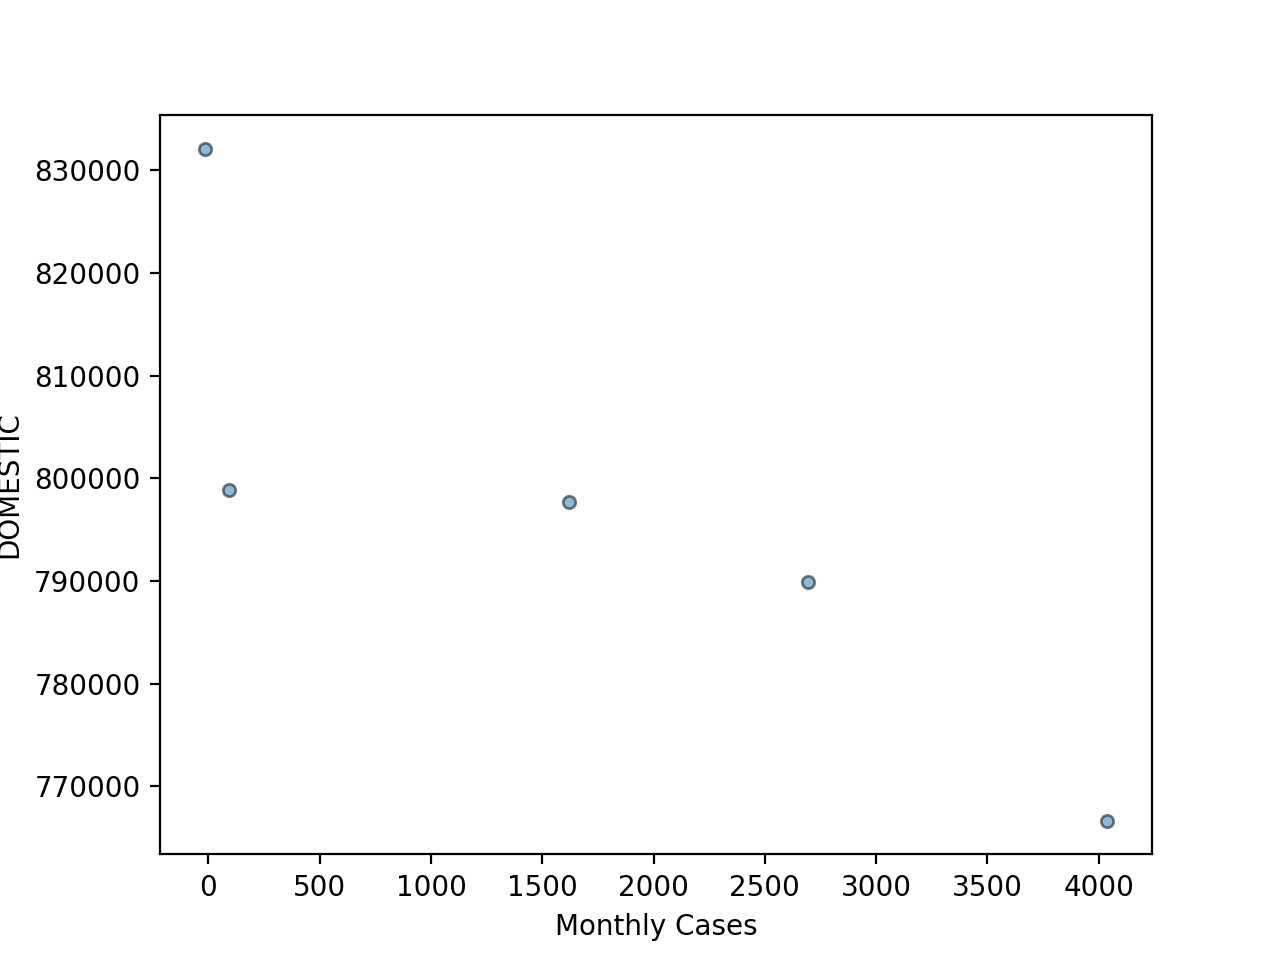

In [70]:
sars_flight_data.plot.scatter(x='Monthly Cases', y='DOMESTIC', marker="o", facecolors="blue", alpha=.5, edgecolors="black")

